# Class 11
## ML Techniques: PCA

Today we look at a technique that can be useful in reducing the number or dimensionality of input features. The classic example of this is in doing machine learning with images. Consider an image that is 200 pixels by 200 pixels. We would like to use information from each pixel as the inputs for a machine learning algorithm. That means we have 40,000 input features! That is more than most learning algorithms can handle.

However, we notice that a fair number of the pixels in our images are black or similarly colored. We also notice that there are some similar features in all of the images. What if we could shrink or compress the number of input features to describe the images? That's what Principal Component Analysis (PCA) does.

We'll start by looking at the iris data that we saw way back in Class 01. We will look at what the PCA is doing and how it works using this data. Then we'll move to working with some image data.

### PCA with the Iris Dataset

I'm following [this tutorial](https://plot.ly/ipython-notebooks/principal-component-analysis/) for this section. Refer to the tutorial for more information on PCA and how it works. I also suggest looking at [this tutorial](http://napitupulu-jon.appspot.com/posts/pca-ud120.html) which uses a more qualitative explanation on how PCA works.

We'll start by loading the dataset and taking a look at it. I remmber that we renamed the columns to make it easier to work with the data, so I copied that piece from Class01, too.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

irisdf = pd.read_csv('../Class01/Class01_iris_data.csv')
irisdf.columns=['sepalLen','sepalWid','petalLen','petalWid','target']
irisdf.head()

,sepalLen,sepalWid,petalLen,petalWid,target
0,5.0,2.3,3.3,1.0,Versicolour
1,5.7,2.9,4.2,1.3,Versicolour
2,4.7,3.2,1.6,0.2,Setosa
3,7.7,3.0,6.1,2.3,Virginica
4,5.5,2.5,4.0,1.3,Versicolour


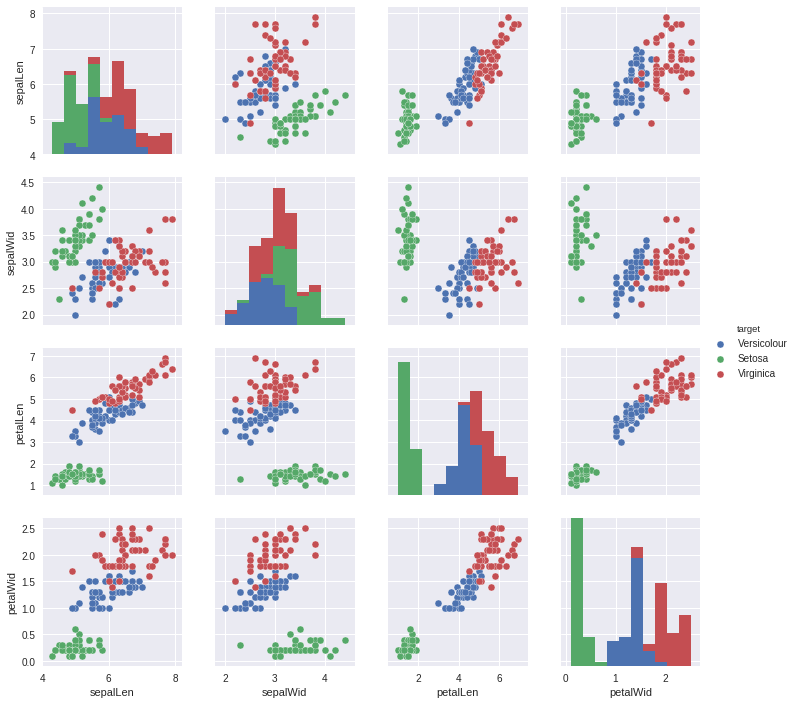

In [2]:
# Plot the data to see what we are working with
sns.pairplot(irisdf, hue='target')

What we see here is that we really have four different input variables and that the output classifications have different distributions in all four variables. Take a look at the diagonal plots in the `pairplot` graph- those are the histograms of each output class for the variable (either column or row- they are the same on the diagonal). We would like to take this four-dimensional data and see if we can rework it down to two dimensions. For example, it looks like petal length and petal width are related to each other. Maybe we can collapse that data into a single dimension. Perhap a similar thing could be done with sepal length and sepal width. Fortunately, we don't have to manually decide how to collapse the data - the algorithm will find the best combination and use it.

We'll use the [Scikit Learn PCA too](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Be sure to take a look at the documentation. We'll do a train/test split here and work with just the training data. As always, we do that as early in the process as we can.

The one input paramter for the `PCA()` tool that we care about right now is the final number of components. This is asking the algorithm to reduce our dataset down to just $n$ components. We'll pick $n=2$ to start with and see what that does to the data. The `fit()` function calculates how to transform the data. The `transform` function then gives us a new set of features that are transformed by the algorithm.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
import numpy as np
# Split up the features and the labels columns
features = irisdf[['sepalLen','sepalWid','petalLen','petalWid']]
labels = irisdf['target']

# Do our train/test split on the data
train_features, test_features, train_labels, test_labels= train_test_split(features, labels, test_size=0.2, random_state=23)

# Try using the PCA: first we train the transformation using the fit function, then we transform the data.
sklearn_pca = PCA(n_components=2)
sklearn_pca.fit(train_features)
pca_train_features = sklearn_pca.transform(train_features)

Now that we've transformed the training features, let's take a look at what we got. Let's start by looking at the output from the `transform()` function.

In [4]:
pca_train_features[1:5]

array([[ 3.46540921,  0.53900563],
       [-2.47634639,  0.53756189],
       [ 1.23856377, -0.18361792],
       [ 2.39392551, -0.2620317 ]])

It looks like it is an array of numbers that appear to by our $(x,y)$ coordinates. Let's try plotting this to see what we've got.

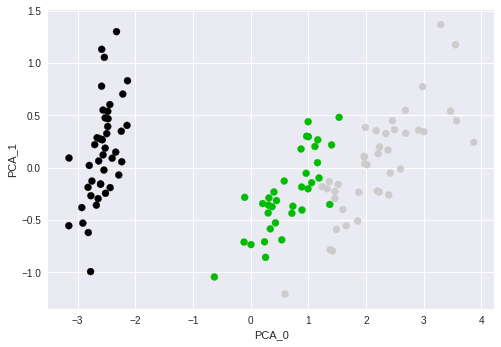

In [5]:
# We can turn the labels into a categorical column, then get the category codes to use them to plot the different labels.
ylabels = train_labels.astype('category').cat.codes

# Make the scatter plot and label the axis
plt.scatter(pca_train_features[:,0],pca_train_features[:,1],c=ylabels,cmap=plt.cm.spectral)
plt.xlabel('PCA_0')
plt.ylabel('PCA_1')

We now have just two input features to work with: `PCA_0` and `PCA_1`. Any future machine learning will now be simplified especially since we see that the data are mostly separated in this two-dimensional space.

We'll run through a comparison to see how the PCA has changed the performance of a couple of different machine learning algorithms that we've seen before (Suppor Vector Classifiers and Decision Tree Classifiers). Remember that the PCA features are half the size of the original dataset (we've shrunk them down to 2 columns instead of 4). Before we fit the data, we need to transform the test features using the PCA tranformation we trained earlier. Remember that we didn't use the test data to train the PCA, so we haven't cheated on this one.

In [6]:
pca_test_features = sklearn_pca.transform(test_features)

In [7]:
# Import both the SVC and DTC classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Train a basic SVC (default values) on the entire dataset and score it
svcmodel = SVC()
svcmodel.fit(train_features,train_labels)
print("SVC on complete dataset score: {}".format(svcmodel.score(test_features, test_labels)))

# Train a similar SVC model using the PCA reduced features and score it
svcmodelPCA = SVC()
svcmodelPCA.fit(pca_train_features,train_labels)
print("SVC on PCA dataset score     : {}".format(svcmodelPCA.score(pca_test_features, test_labels)))

# Try the decision tree version on the entire model
dtmodel = DecisionTreeClassifier(random_state=32)
dtmodel.fit(train_features,train_labels)
print("DTC on complete dataset score: {}".format(dtmodel.score(test_features,test_labels)))

dtmodelPCA = DecisionTreeClassifier(random_state=32)
dtmodelPCA.fit(pca_train_features,train_labels)
print("DTC on PCA dataset score     : {}".format(dtmodelPCA.score(pca_test_features,test_labels)))


SVC on complete dataset score: 0.9333333333333333
SVC on PCA dataset score     : 0.9333333333333333
DTC on complete dataset score: 0.9333333333333333
DTC on PCA dataset score     : 0.9333333333333333


Wow! The PCA dataset scores the same as the full datasets using both machine learning algorithms. Now we haven't optimized anything, but this is a good indication that the PCA is doing its job: shrinking the number of input features while keeping the performance of the machine learning algorithm.

## Working with Facial Images

Now that we've got a basic idea on how the PCA works and when to use it, let's try using it on image data. We are interested in training a machine learning algorithm to recognize the faces of specific people: we provide a picture of a person and the machine tells us who it is. We're going to follow [this tutorial](http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html#sphx-glr-auto-examples-applications-face-recognition-py). I've already downloaded the data and stored it in a binary storage container (called a *pickle* in python). We'll load the data and take a look at what we've got.



In [8]:
import pickle
people = pickle.load(open('people.pkl', 'rb')) # This is how we load pickled data

#Find out how many faces we have, and
#the size of each picture from.
n_images, h, w = people.images.shape
print("{0} images that are {1} pixels by {2} pixels in size with a total of {3} features per image".format(n_images,h,w,h*w))

1140 images that are 50 pixels by 37 pixels in size with a total of 1850 features per image


So our machine learning algorithm would have to train on 1850 different features! Let's take a look at a couple of the images. We'll first get out the images and their labels. How to do this comes from the [documentation for this dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html).

In [9]:
# First we get the list of features
imagefeatures = people.data
# And the list of labels - this is a set of numbers (0-4) corresponding to the 5 different people
imagelabels = people.target
# We'd like to get the people's names, too.
target_names = people.target_names
print(target_names)


['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


Let's image this and see what the images look like. We will pick a random person, list their name, and show their picture. We can rerun the cell to get different random pictures.

Person 695 :George W Bush


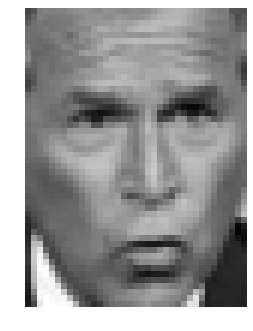

In [10]:
pickaperson = np.random.randint(0,n_images)
sns.set_style('white')
personname = target_names[imagelabels[pickaperson]]
print("Person {} :".format(pickaperson) + personname)
personimage = imagefeatures[pickaperson].reshape(h,w)
plt.axis('off')
plt.imshow(personimage,cmap=plt.cm.gray)


Ok, back to business. Let's split off our training/testing dataset. We want to be a little careful about this: we don't want to accidentally get all images of one person in our training dataset. We can split it based on the label so that we have equal distributions of all the different classes. We use the `stratify=imagelabels` option that tells `train_test_split` to use equal numbers of the different classes in each split.

We will then find the principal components using the PCA analysis. In this case we'll use 150 components. So the net effect is that we are shrinking the number of features from 1850 to 150.

We're using two more options for the PCA: when working with images, I've found that the performance is better when we use the `randomized` SVD solver and set the `whiten=True` option  ([see this page for more information](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)).

In [11]:
# split into a training and testing set
features_train, features_test, labels_train, labels_test = train_test_split(imagefeatures, imagelabels, stratify=imagelabels, test_size=0.20, random_state=23)
 
# Compute the PCA (eigenfaces) on the face dataset
n_components = 150
 
imgpca = PCA(n_components=n_components,svd_solver='randomized',
          whiten=True).fit(features_train)

pca_features_train = imgpca.transform(features_train)

We can look at the way in which the PCA has broken up the images- in this case it is something like looking at which axis (or eigenvector if you've had linear algebra) it used. These components tell us something about the features that were most common to all of the images. That is why the PCA algorithm chose them.

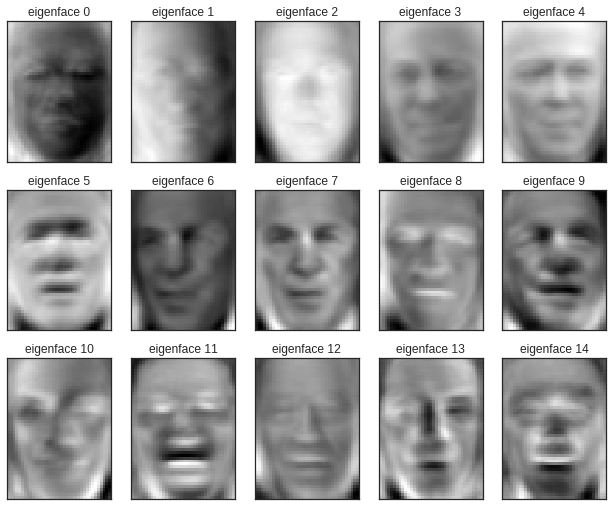

In [12]:
# First get the components and reshape them to the right size for images
eigenfaces = imgpca.components_.reshape((n_components, h, w))

# A helper function to make plots of the components

def plot_gallery(images, titles, h, w, n_row=3, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99,
                        top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
 
# Plot the gallery of the most significative eigenfaces
eigenface_titles = [
    "eigenface %d" % i for i in range(eigenfaces.shape[0])]
 
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.tight_layout()

We'll come back to these images in a little bit- they give us the start of an algorithm to detect faces out of other images.

Now that we've got the PCA features, let's try an run a machine learning algorithm to see if we can detect the faces. We'll try using both the complete dataset as well as the PCA reduced data set. This time let's compare how long it takes to train the model.


In [13]:
from time import time
t0 = time()
svcmodel = SVC().fit(features_train, labels_train)
accuracy_score = svcmodel.score(features_test,labels_test)
print("Done in {0:.3f}s with accuracy {1:.3f}".format(time() - t0,accuracy_score))

Done in 4.763s with accuracy 0.465


In [14]:
pca_features_test = imgpca.transform(features_test)

t0 = time()
svcmodel_pca = SVC().fit(pca_features_train, labels_train)
accuracy_score_pca = svcmodel_pca.score(pca_features_test,labels_test)
print("done in {0:.3f}s with accuracy {1:.3f}".format(time() - t0,accuracy_score_pca))

done in 0.551s with accuracy 0.838


Here is where we see the power of the PCA: not only did it take 1/10th the time to train the model, but we got a better result! That speedup means we can potentially deal with significantly larger sets of input features without having to wait forever for the output.

### An Aside: using GridSearchCV to optimize Hyperparameters.

Ok, we did pretty well using the default hyperparameters for the SVC. But, as we know, we can often do better by tuning them. One way to do this is to create a list of possibilities and let the computer try all combinations and tell us which one was best. Because we've sped up the training, we can do this. We're going to use the `GridSearchCV` function. We first need to define the parameters we'll be scanning and what values we want to scan over.

In [15]:
from sklearn.model_selection import GridSearchCV

t0 = time()
# Define my parameters and the values we want to try
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

# We then call the GridSearchCV, tell it what machine learning algorithm to use, and what parameters to scan
clf = GridSearchCV(SVC(), param_grid)

# Like other functions, we now fit it.
clf = clf.fit(pca_features_train, labels_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

accuracy_score_pca = clf.score(pca_features_test,labels_test)
print("New accuracy score: {}".format(accuracy_score_pca))

done in 21.075s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
New accuracy score: 0.8991228070175439


So we are now running with about 89% accuracy in identifying the person in the picture. Not bad for a couple of seconds of training! I'm curious as to the confusion matrix: are we equally good at identifying all five of the people? Who are we confusing?

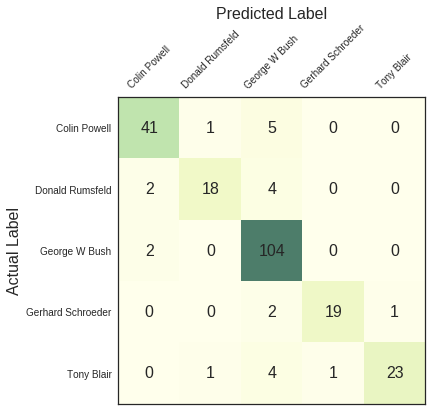

In [16]:
from sklearn.metrics import confusion_matrix

labels_pred = clf.predict(pca_features_test)
cnf_matrix = confusion_matrix(labels_test, labels_pred)

def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix,cmap=plt.cm.YlGn,alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)
        
show_confusion_matrix(cnf_matrix,target_names)

As we saw with the accuracy score, we're doing pretty good. There doesn't appear to be a lot of obvious mistakes here: It looks like Tony Blair was mistaken for some of the other people, but nothing stands out dramatically.

## Computer Vision: Finding Faces in an Image

Although this is not a class on computer vision, there is a connection between the two. We may want to use images as our input data. If we can reduce the size of the features by, for example, identifying the face out of an image, we can reduce the work we have to do by focusing on the face. The way we identify faces is connected to the eigenface plot we made above. The basic trick is to search for features that are common to all human faces. Then, once we found some of the basic features, we iteratively look more closely at those areas of the image, honing in on the face.

There are some good resouces on how this works [here](http://www.cs.unc.edu/~lazebnik/spring09/lec22_eigenfaces.pdf), [here](http://www.cs.unc.edu/~lazebnik/spring09/lec23_face_detection.pdf), and [here](http://www.cs.unc.edu/~lazebnik/spring09/).

We can test out the image recognition using the OpenCV (cv2) package for python.

### Haar Cascade

The tool we want to use is called the Haar Cascade classifier. We'll need to load it in, then use it to find faces in a picture.


(-0.5, 279.5, 238.5, -0.5)

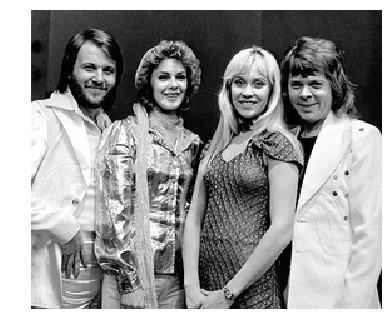

In [17]:
import cv2
import matplotlib.pyplot as plt
# Load the classifier
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# read the image
img = cv2.imread('ABBA.png')

# make sure it is grayscale - the classifier does not work on color images
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap=plt.cm.gray)
plt.axis('off')

Now we want to detect the faces in the image. We'll apply the facial detection algorithm.


In [18]:
# Detect faces in the image
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30))
print("Found {0} faces".format(len(faces)))

Found 4 faces


Now that we've found faces in the image, we can identify where they are at and put rectangles around them. We'll use the OpenCV package for adding a rectangle around each of the detected face regions.

(-0.5, 279.5, 238.5, -0.5)

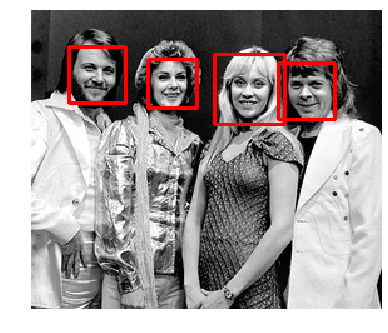

In [19]:
roi_gray=[]

for (x,y,w,h) in faces:
    roi_gray.append(gray[y:y+h, x:x+w])
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(img)
plt.axis('off')

(-0.5, 44.5, 44.5, -0.5)

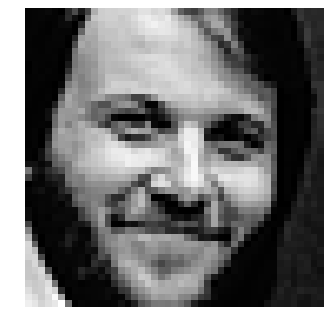

In [20]:
# We can also look at the individual faces:
facenumber = 0
plt.imshow(roi_gray[facenumber],cmap=plt.cm.gray)
plt.axis('off')

## In-class Activities

I've got two things for you to work on: first, let's join the facial detection algorithm with the facial recognition algorithm. Find a picture of one of the five people we used in the facial detection (preferably a picture of more than just their face so it will be interesting).

Run the facial detection algorithm and find their face out of the photo. We'll need to crop and re-shape the image in order to use it with our facial detection algorithm. In the end we need an image that is 37 pixels wide and 50 pixels tall. Once we have that, test to see if the trained model can recognize our new face. 

## Assignment

I want you to try out the PCA analysis on your own dataset. Reduce the dimensionality of your features and see how that changes the performance score and the time required to fit your model.
